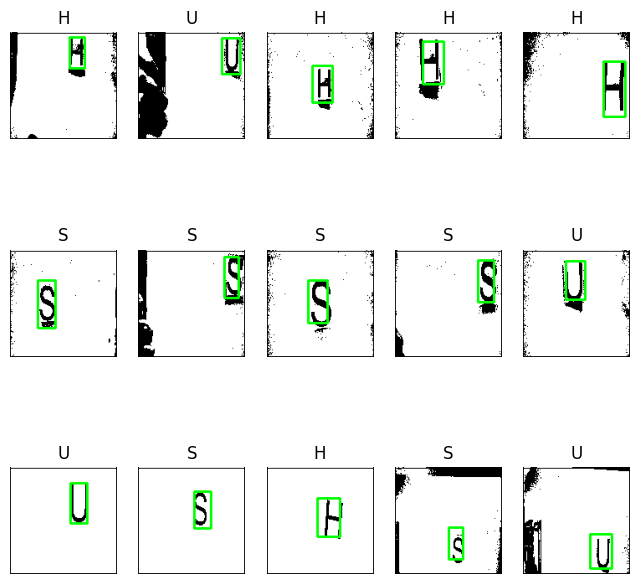

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import cv2 
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt 

model = load_model('model.h5')
fig = plt.figure(figsize=(8, 8)) 

cnt = 1

for i in os.listdir("test/") :
        img = cv2.imread("test/" + i)
        h, w ,c = img.shape
        img = cv2.line(img, (0, 0), (0, 127), (0, 0, 0), 1) 
        img = cv2.line(img, (0, 1), (127, 1), (0, 0, 0), 1) 
        img = cv2.line(img, (0, 127), (127, 127), (0, 0, 0), 1) 
        img = cv2.line(img, (127, 0), (127, 127), (0, 0, 0), 1) 

        frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        ret, frame = cv2.threshold(frame, 70, 255, cv2.THRESH_BINARY)  
        input = (np.expand_dims(frame, 0))
        
        x = model.predict(input, verbose=0)
        cls = np.argmax(x[1][0])

        if cls != 0 :
            if cls == 1 :
                char = "H"
            if cls == 2 :
                char = "S"
            if cls == 3 :
                char = "U"

            x1 = x[0][0][0] * (w / 128) * 128 
            y1 = x[0][0][1] * (h / 128) * 128 
            x2 = x[0][0][2] * (w / 128) * 128 
            y2 = x[0][0][3] * (h / 128) * 128

            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # cv2.putText(img, char, (10, 10), cv2.FONT_HERSHEY_SIMPLEX , 1, (0, 255, 0), 1, cv2.LINE_AA) 

        fig.add_subplot(3, 5, cnt) 
        cnt += 1
        plt.imshow(img) 
        plt.axis('off') 
        plt.title(char) 

